In [1]:
## Importing the libraries
import re
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import import_data as im

### Uploading the data to MongoDB using CMD
1. Change the directory
2. write the below query in CMD
3. mongoimport -d project1 -c Googledata --type csv --file googleplaystore.csv --headerline

In [2]:
## Read the data from custom funtion

In [3]:
df=im.read_datafrom_mongo()

In [4]:
df

,_id,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,602a3b2f2782bbe706e8786c,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
1,602a3b2f2782bbe706e8786d,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
2,602a3b2f2782bbe706e8786e,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
3,602a3b2f2782bbe706e8786f,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,602a3b2f2782bbe706e87870,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,602a3b2f2782bbe706e8a2bf,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,602a3b2f2782bbe706e8a2c0,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,602a3b2f2782bbe706e8a2c1,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,602a3b2f2782bbe706e8a2c2,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             10840 non-null  object 
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          9366 non-null   float64
 4   Reviews         10840 non-null  object 
 5   Size            10840 non-null  object 
 6   Installs        10840 non-null  object 
 7   Type            10839 non-null  object 
 8   Price           10840 non-null  object 
 9   Content Rating  10839 non-null  object 
 10  Genres          10840 non-null  object 
 11  Last Updated    10840 non-null  object 
 12  Current Ver     10832 non-null  object 
 13  Android Ver     10837 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.2+ MB


In [6]:
## We have arround 14 features where 13 of them are object dtype and one in float

In [7]:
df.isnull().sum()

_id                  0
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
## We have missing  values in  Rating, Type, Current ver and android ver

In [9]:
## Lets drop the feature Id Since its does not make any sense to the model
df=df.drop('_id',axis=1)

In [10]:
## The Application name does not make any impact to the ratings. lets drop the feature 
df=df.drop('App',axis=1)

In [11]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
1,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
2,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
3,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [12]:
## Exploratory Data ANalysis

In [13]:
df.Size.nunique()



462

In [14]:
df.Installs.nunique()

22

In [15]:
## We need to reduce these categories since there are 

In [16]:
## Renaming few features
df.rename(columns={'Last Updated': 'Lastupdated','Content Rating':'ContentRating','Current Ver': 'CurrentVer','Android Ver': 'AndroidVer'},inplace=True)

In [17]:
df.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'ContentRating', 'Genres', 'Lastupdated', 'CurrentVer', 'AndroidVer'],
      dtype='object')

In [18]:
df.Lastupdated.nunique()

1378

In [19]:
import datetime as dt

In [20]:
##df['Lastupdated']=df['Lastupdated'].str.split(',',n=1,expand=False)

In [21]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Lastupdated,CurrentVer,AndroidVer
0,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
1,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
2,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
3,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [22]:

##df['Lastupyear']=df.Lastupdated.str.split(',',n=1)

In [23]:
## Splitting the values into two columns and creating a dataframe
df1=pd.DataFrame(df.Lastupdated.str.split(",",1).tolist(),columns=['Lastupdated_date','Lastupdated_year']) ## 1= no of splits

In [24]:
df1

,Lastupdated_date,Lastupdated_year
0,January 15,2018
1,August 1,2018
2,June 8,2018
3,June 20,2018
4,March 26,2017
...,...,...
10835,July 25,2017
10836,July 6,2018
10837,January 20,2017
10838,January 19,2015


In [25]:
## Lets merge the dataframe

In [26]:
df_final=pd.concat([df,df1],axis=1)

In [27]:
df_final

,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Lastupdated,CurrentVer,AndroidVer,Lastupdated_date,Lastupdated_year
0,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,January 15,2018
1,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,August 1,2018
2,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,June 8,2018
3,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,June 20,2018
4,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,March 26,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,July 25,2017
10836,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,July 6,2018
10837,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,January 20,2017
10838,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,January 19,2015


In [28]:
df_final['Lastupdated_year']=df_final['Lastupdated_year'].apply(lambda x: str(x).strip()) ## Removing white spaces

In [29]:
df_final.isnull().sum()

Category               0
Rating              1474
Reviews                0
Size                   0
Installs               0
Type                   1
Price                  0
ContentRating          1
Genres                 0
Lastupdated            0
CurrentVer             8
AndroidVer             3
Lastupdated_date       0
Lastupdated_year       0
dtype: int64

In [30]:
df_final.Lastupdated_year.value_counts()

2018    7348
2017    1867
2016     804
2015     459
2014     209
2013     110
2012      26
2011      15
None       1
2010       1
Name: Lastupdated_year, dtype: int64

In [31]:
## Lets us consider the year and we will not consider the month. since year is more then enough to consider for the model.

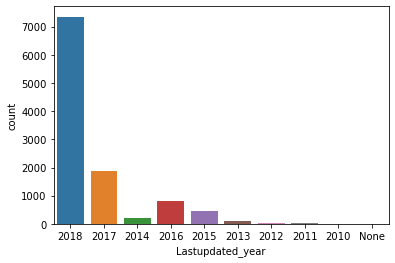

In [32]:
sns.countplot(df_final.Lastupdated_year)

In [33]:
## most of the apps are updated recently as per the data we have ie till 2018.

In [34]:
## Lets drop the feature like currentver and androidver. since we believe its doesn't make much of a sense to our dependent featue

In [35]:
print(df_final.AndroidVer.nunique())
print(df_final.CurrentVer.nunique())

33
2832


In [36]:
## Even though the currentver of the application make sense to the ratings. but the feature has  2785 categories. it  cant be 
## considered has a quantitative feature too

In [37]:
df_final.CurrentVer.value_counts()

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
2.1.7.3                  1
60                       1
4.1.239                  1
v1.1072.35.0             1
1.1.0.0.1487             1
Name: CurrentVer, Length: 2832, dtype: int64

In [38]:
df_final=df_final.drop(['CurrentVer','AndroidVer'],axis=1)

In [39]:
df_final

,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Lastupdated,Lastupdated_date,Lastupdated_year
0,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",January 15,2018
1,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",August 1,2018
2,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",June 8,2018
3,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",June 20,2018
4,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",March 26,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",July 25,2017
10836,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",July 6,2018
10837,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",January 20,2017
10838,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",January 19,2015


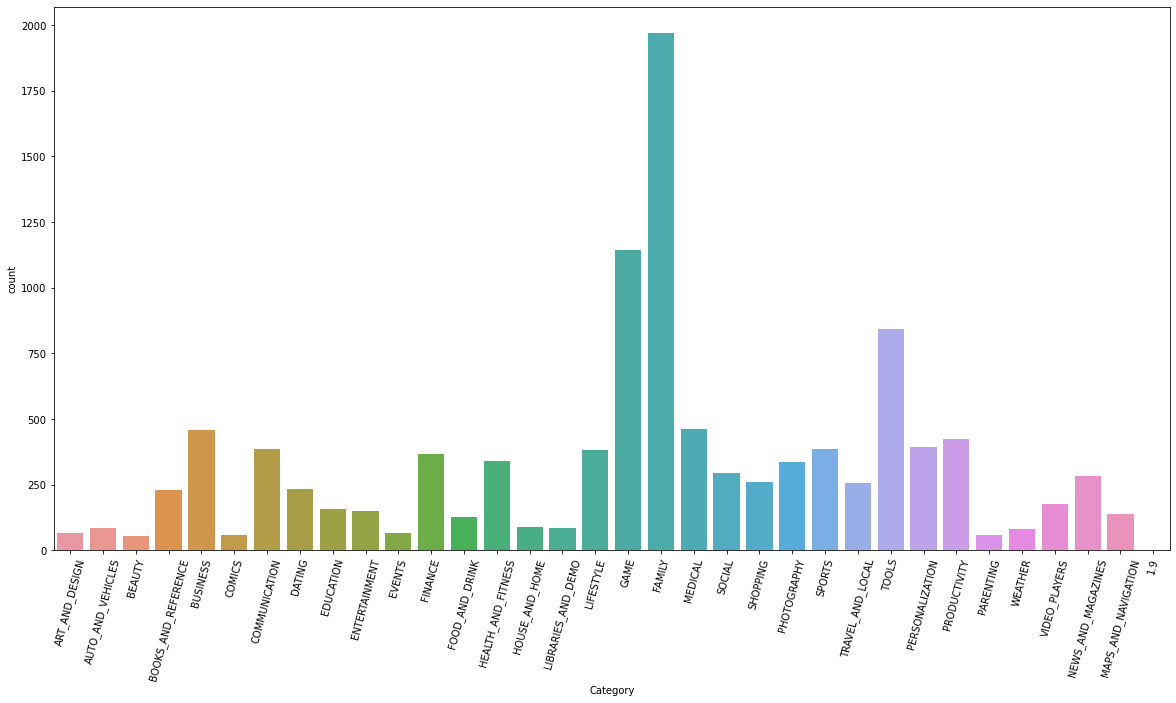

In [40]:
## Category 
plt.figure(figsize=(20,10))
sns.countplot(df['Category'])
plt.xticks(rotation=75)
plt.show()

In [41]:
## Family, Tools,game have significant data in the datframe
## There are around 34 categories let see whether we can remove some of the catefories based on the important

In [42]:
df.Reviews.nunique()

6002

In [43]:
df.Rating.mean()

4.193348281016448

In [44]:
df.Rating.mode()

0    4.4
dtype: float64

In [45]:
df['Rating'].std()

0.5374591304600067

In [46]:
df.Rating.median()

4.3

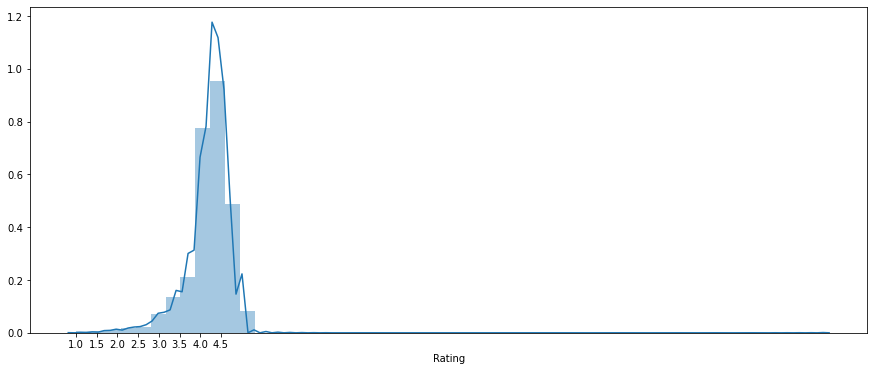

In [47]:
plt.figure(figsize=(15,6))
sns.distplot(df['Rating'])
plt.xticks(np.arange(1,5,0.5))
plt.show()

In [48]:
## The data seems to be left skewed ie the tail on the left side seems long..
## Mode< Median< mean

In [49]:
df_final.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
253k                     1
246k                     1
913k                     1
691k                     1
545k                     1
Name: Size, Length: 462, dtype: int64

In [50]:
## Rating Featurte
df.Rating.nunique()
df.Rating.value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      707
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.8        8
1.7        8
1.6        4
1.5        3
1.4        3
1.2        1
19.0       1
Name: Rating, dtype: int64

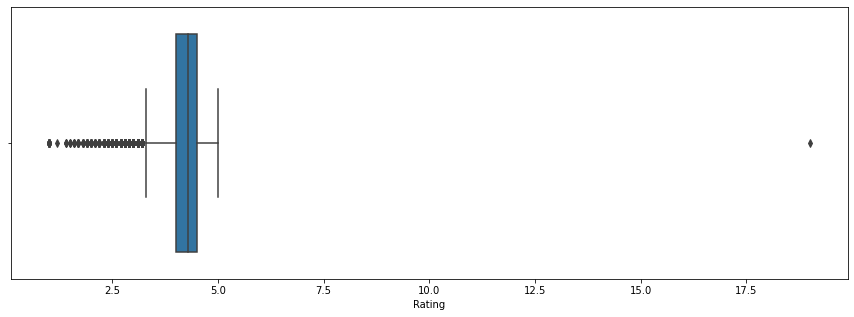

In [51]:
plt.figure(figsize=(15,5))
sns.boxplot(df['Rating'])

In [52]:
lst=['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'ContentRating', 'Genres', 'Lastupdated', 'Lastupdated_date', 'Lastupdated_year']

In [53]:
for x in lst:
    print(x+":",df_final[x].nunique())

Category: 34
Reviews: 6002
Size: 462
Installs: 22
Type: 3
Price: 93
ContentRating: 6
Genres: 120
Lastupdated: 1378
Lastupdated_date: 367
Lastupdated_year: 10


In [54]:
## Since we almost all the featues are categorical and we have high cardinality
## especially features like size,category,genres.
## Lets see if we can reduce the the cardinality ie no of categories

Free    10038
Paid      800
0           1
Name: Type, dtype: int64


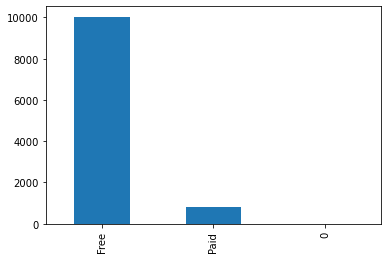

In [55]:
df_final.Type.value_counts().plot(kind='bar')
print(df_final.Type.value_counts())

In [56]:
## More then 90% of the applications are free 

In [57]:
df_final[df_final.Type==0]

,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Lastupdated,Lastupdated_date,Lastupdated_year


In [58]:
## Lets drop the above row from the dataframe

In [59]:
df_final.drop(df_final.index[10471],inplace=True)

Everyone           8713
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: ContentRating, dtype: int64


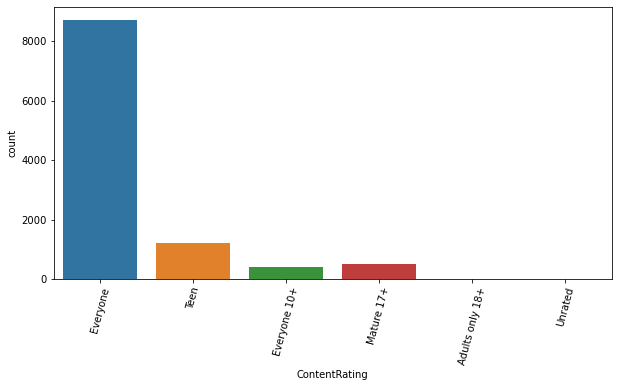

In [60]:
## Content Rating
plt.figure(figsize=(10,5))
sns.countplot(df_final.ContentRating)
plt.xticks(rotation=75)
print(df_final.ContentRating.value_counts())

In [61]:
## We can conmbine few labels as those labels are similar
content_map={'Everyone':'Everyone','Everyone 10+':'Everyone 10+','Teen':'Teen','Mature 17+':'Adults','Adults only 18+':'Adults','Unrated':'Adults'}

In [62]:
df_final['ContentRating']=df_final['ContentRating'].map(content_map)

In [63]:
df_final.ContentRating.value_counts()

Everyone        8713
Teen            1208
Adults           504
Everyone 10+     414
Name: ContentRating, dtype: int64

In [64]:
df_final.isnull().sum()

Category               0
Rating              1474
Reviews                0
Size                   0
Installs               0
Type                   1
Price                  0
ContentRating          0
Genres                 0
Lastupdated            0
Lastupdated_date       0
Lastupdated_year       0
dtype: int64

In [65]:
## Has assumed the most of the applications can be used by any age peoples.

In [66]:
df_final.Genres.value_counts().sort_values()

Music & Audio;Music & Video       1
Role Playing;Education            1
Books & Reference;Creativity      1
Card;Brain Games                  1
Entertainment;Education           1
                               ... 
Business                        460
Medical                         463
Education                       549
Entertainment                   623
Tools                           842
Name: Genres, Length: 119, dtype: int64

In [67]:
df_final.dtypes

Category             object
Rating              float64
Reviews              object
Size                 object
Installs             object
Type                 object
Price                object
ContentRating        object
Genres               object
Lastupdated          object
Lastupdated_date     object
Lastupdated_year     object
dtype: object

In [68]:
df_final.Price.value_counts()

0         10039
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$2.50         1
$15.99        1
$30.99        1
$1.29         1
$1.96         1
Name: Price, Length: 92, dtype: int64

In [69]:
import re

In [70]:
## Lets remove the $ symbol

In [71]:
df_final['Price'] = df_final.Price.apply(lambda x: re.sub('\$','',str(x)) if pd.notna(x) else x)

In [72]:
## Convert the data type
df_final['Price']=df_final['Price'].astype(float)

In [73]:
## round the float values
df_final['Price']=round(df_final['Price'])

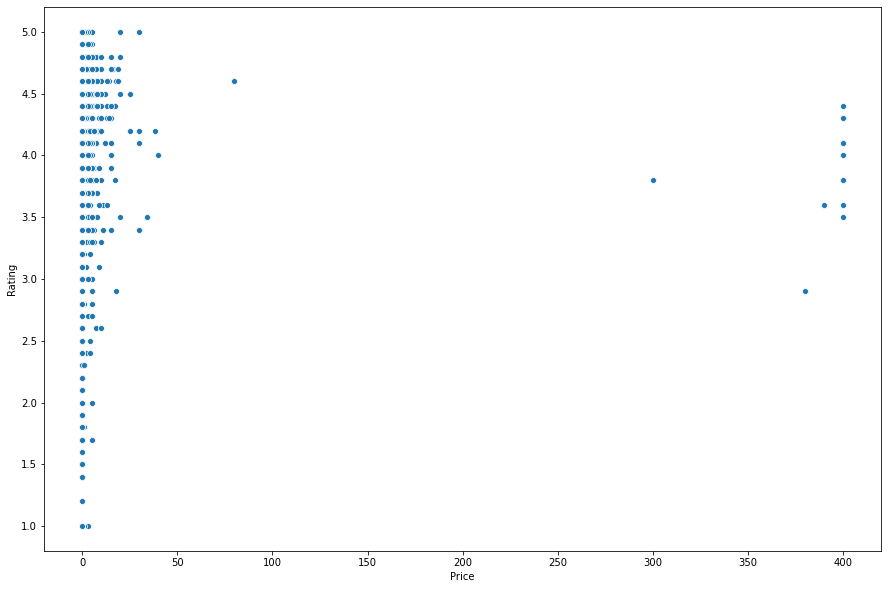

In [74]:
## lets do a plot w.r.to ratings
plt.figure(figsize=(15,10))
sns.scatterplot(x=df_final.Price,y=df_final.Rating)
##plt.xticks(np.arange(0,50,5))

In [75]:
## Its abvious since 90 percent of the apps are for free. We cant expect ratings for other paid apps. May be if we have data for paid 
## apps then we can intrepret more

In [76]:
## We can convert Price data to categorical 
df_final

,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Lastupdated,Lastupdated_date,Lastupdated_year
0,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",January 15,2018
1,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",August 1,2018
2,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",June 8,2018
3,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",June 20,2018
4,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0.0,Everyone,Art & Design,"March 26, 2017",March 26,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FAMILY,4.5,38,53M,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",July 25,2017
10836,FAMILY,5.0,4,3.6M,100+,Free,0.0,Everyone,Education,"July 6, 2018",July 6,2018
10837,MEDICAL,NaN,3,9.5M,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",January 20,2017
10838,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0.0,Adults,Books & Reference,"January 19, 2015",January 19,2015


In [77]:
## Lets explore on Insalls.

df_final.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1053
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [78]:
## lets remove + and , and try to convert into an integer/float
df_final['Installs']=df_final.Installs.apply(lambda x: re.sub('\+','',str(x)) if pd.notna(x) else x)
df_final['Installs']=df_final.Installs.apply(lambda x: re.sub('\,','',str(x)) if pd.notna(x) else x)

In [79]:
df_final['Installs']=df_final['Installs'].astype(int)

In [80]:
df_final.Installs.value_counts().sort_values()

0               15
1000000000      58
1               67
500000000       72
5               82
50             205
50000000       289
500            330
10             386
100000000      409
5000           477
50000          479
500000         539
100            719
5000000        752
1000           907
10000         1053
100000        1169
10000000      1252
1000000       1579
Name: Installs, dtype: int64

In [81]:
## We can convert this to a categorical feature labeld by providing a range of values to each labels

In [82]:
df_final

,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Lastupdated,Lastupdated_date,Lastupdated_year
0,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",January 15,2018
1,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",August 1,2018
2,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",June 8,2018
3,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",June 20,2018
4,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",March 26,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",July 25,2017
10836,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",July 6,2018
10837,MEDICAL,NaN,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",January 20,2017
10838,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Adults,Books & Reference,"January 19, 2015",January 19,2015


In [83]:
## Before proceeding with data encoding. lets fill the null values
df_final.isnull().sum()

Category               0
Rating              1474
Reviews                0
Size                   0
Installs               0
Type                   1
Price                  0
ContentRating          0
Genres                 0
Lastupdated            0
Lastupdated_date       0
Lastupdated_year       0
dtype: int64

In [84]:
## Type

df_final.Type.value_counts()

Free    10038
Paid      800
Name: Type, dtype: int64

In [85]:
## lets fill with max value 

df_final['Type']=df_final['Type'].fillna('Free')

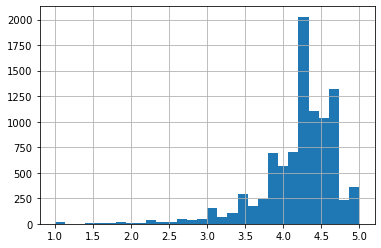

In [86]:
## Rating
figure=df_final.Rating.hist(bins=30)

In [87]:
df_final.Rating.describe()

count    9365.000000
mean        4.191767
std         0.515245
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [88]:
one_st=df_final.Rating.mean() + df_final.Rating.std()

In [89]:
one_st

4.7070127142526275

In [90]:
one_st_neg=df_final.Rating.mean() - df_final.Rating.std()

In [91]:
one_st_neg

3.676521722479899

In [92]:
## The range of onestandarddeviation is (3.67,4.70)

In [93]:
## Lets see if we can find any logic with respect to independent variables

In [94]:
three_under=df_final[df_final.Rating <=3]
Four_under=df_final[(df_final.Rating  >3) & (df_final.Rating <=4)]
Five_under=df_final[(df_final.Rating  >4)]

In [95]:
df_final.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'ContentRating', 'Genres', 'Lastupdated', 'Lastupdated_date',
       'Lastupdated_year'],
      dtype='object')

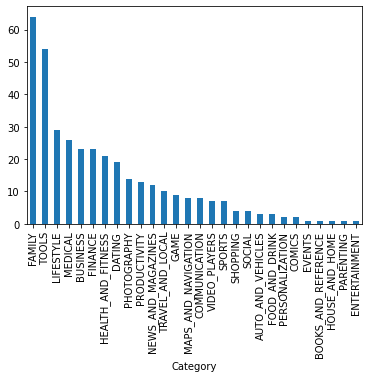

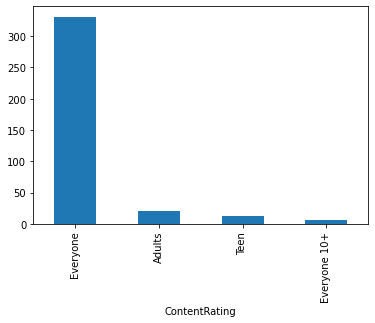

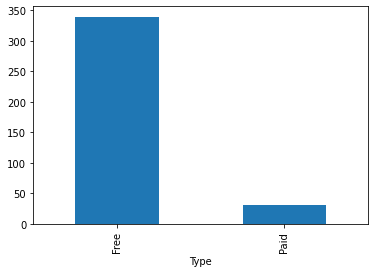

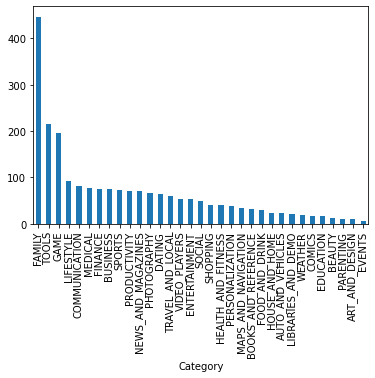

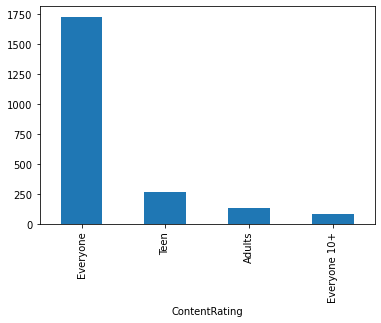

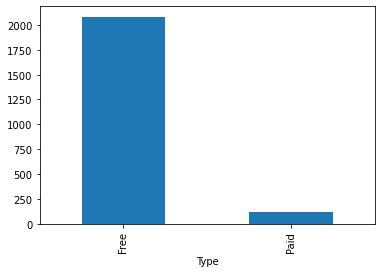

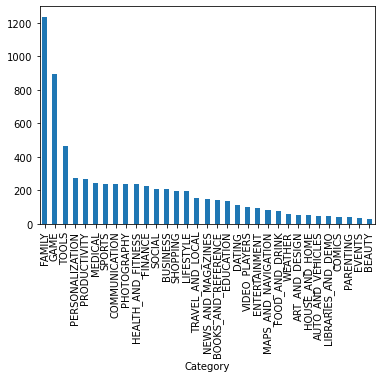

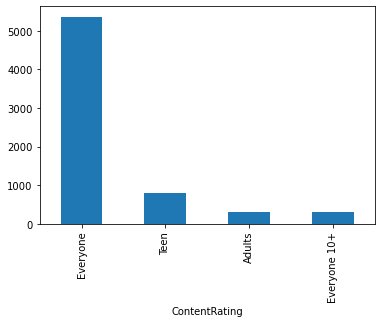

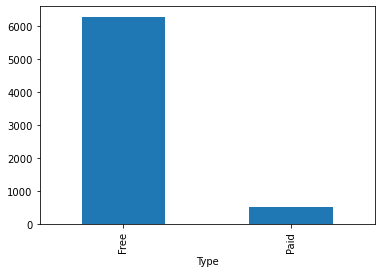

In [96]:
lst=[three_under,Four_under,Five_under]
Columns=['Category','ContentRating','Type']
for x in lst:
    for y in Columns:
        x[y].value_counts().plot(kind='bar')
        plt.xlabel("{}".format(y))
        plt.show()
        
    
    


In [97]:
## AS you can see in each dataframe one of the category is dominating in each features. this is obvious since in orginal data also
## these are dominating

In [98]:
## We can either go with any imputer/algorithm/stats to fill the null values

In [99]:
## Before computing the missing values lets encode the independent variables 

In [100]:
df_final.Category.value_counts() 

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           64
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

In [101]:

df_final.Category.nunique()

33

In [102]:
df_final.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'ContentRating', 'Genres', 'Lastupdated', 'Lastupdated_date',
       'Lastupdated_year'],
      dtype='object')

### observations:
 - Category - Since all the categories has some significant amount of values we are not going to reduce the the no of        categories
 - Reviews - We are not going to consider any sentiment from the reviews hence we will drop this feature. also we cant say based on no of reviews we will evaluate ratings its about how the raings are
 - Size, Installs,Price,Genres - lets try to encode  
 - year- we have seperated the year from the lastupdated column which is more then enough for the dependent feature
 - Lastupdated, date - We will drop these columns

In [103]:
df_final.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
23k                      1
442k                     1
61k                      1
437k                     1
545k                     1
Name: Size, Length: 461, dtype: int64

In [104]:
df_final.Size.nunique()

461

In [105]:
df_final.Installs.value_counts().sort_index()

0               15
1               67
5               82
10             386
50             205
100            719
500            330
1000           907
5000           477
10000         1053
50000          479
100000        1169
500000         539
1000000       1579
5000000        752
10000000      1252
50000000       289
100000000      409
500000000       72
1000000000      58
Name: Installs, dtype: int64

In [106]:
## installs
df_final['install_Labels']= pd.cut(x=df_final['Installs'],bins=[-1,1000,1000000,10000000,1000000000],labels=['Zero - Thousand','Morethan Thousand - 1Million','Morethan 1Million - 10Million','Morethan 10Million'])
## the first value will be always be the next value of what you mentioned

In [107]:
df_final.install_Labels.value_counts()

Morethan Thousand - 1Million     5296
Zero - Thousand                  2711
Morethan 1Million - 10Million    2004
Morethan 10Million                828
Name: install_Labels, dtype: int64

In [108]:
df_final.install_Labels.value_counts()

Morethan Thousand - 1Million     5296
Zero - Thousand                  2711
Morethan 1Million - 10Million    2004
Morethan 10Million                828
Name: install_Labels, dtype: int64

In [109]:
df_final.Price.value_counts().sort_index()

0.0      10039
1.0        201
2.0        112
3.0        145
4.0         78
5.0         85
6.0         35
7.0         15
8.0          9
9.0          7
10.0        24
11.0         2
12.0         5
13.0         5
14.0         3
15.0        12
16.0         1
17.0         3
18.0         2
19.0         2
20.0         7
25.0         7
26.0         1
29.0         1
30.0         7
31.0         1
34.0         2
38.0         1
40.0         2
47.0         1
75.0         1
80.0         2
90.0         1
110.0        1
155.0        1
200.0        1
300.0        1
380.0        1
390.0        1
395.0        1
400.0       13
Name: Price, dtype: int64

In [110]:
## Price
df_final['Price_label']= pd.cut(x=df_final['Price'],bins=[-1,0,100,1000],labels=['Free','1$ to 100$','101$ or above'])

In [111]:
df_final.Price_label.value_counts()

Free             10039
1$ to 100$         780
101$ or above       20
Name: Price_label, dtype: int64

In [112]:
df_final

,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Lastupdated,Lastupdated_date,Lastupdated_year,install_Labels,Price_label
0,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",January 15,2018,Morethan Thousand - 1Million,Free
1,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",August 1,2018,Morethan 1Million - 10Million,Free
2,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",June 8,2018,Morethan 10Million,Free
3,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",June 20,2018,Morethan Thousand - 1Million,Free
4,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",March 26,2017,Morethan Thousand - 1Million,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",July 25,2017,Morethan Thousand - 1Million,Free
10836,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",July 6,2018,Zero - Thousand,Free
10837,MEDICAL,NaN,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",January 20,2017,Zero - Thousand,Free
10838,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Adults,Books & Reference,"January 19, 2015",January 19,2015,Zero - Thousand,Free


In [113]:
## Genres
df_final.Genres.value_counts()

Tools                          842
Entertainment                  623
Education                      549
Medical                        463
Business                       460
                              ... 
Parenting;Brain Games            1
Role Playing;Brain Games         1
Puzzle;Education                 1
Lifestyle;Education              1
Music & Audio;Music & Video      1
Name: Genres, Length: 119, dtype: int64

In [114]:
df_final.Genres.nunique()

119

In [115]:
## Lets us take only top 20 categories and change the rare categories as 'others'
Genres_Top20=df_final.Genres.value_counts()[:20].index

In [116]:
df_final.Genres.value_counts()[:20].sum()

7886

In [117]:
Genres_Top20

Index(['Tools', 'Entertainment', 'Education', 'Medical', 'Business',
       'Productivity', 'Sports', 'Personalization', 'Communication',
       'Lifestyle', 'Finance', 'Action', 'Health & Fitness', 'Photography',
       'Social', 'News & Magazines', 'Shopping', 'Travel & Local', 'Dating',
       'Books & Reference'],
      dtype='object')

In [118]:
lst_20=Genres_Top20.to_list()

In [119]:
lst_20

['Tools',
 'Entertainment',
 'Education',
 'Medical',
 'Business',
 'Productivity',
 'Sports',
 'Personalization',
 'Communication',
 'Lifestyle',
 'Finance',
 'Action',
 'Health & Fitness',
 'Photography',
 'Social',
 'News & Magazines',
 'Shopping',
 'Travel & Local',
 'Dating',
 'Books & Reference']

In [120]:
df_final['Genres']=np.where(df_final['Genres'].isin(Genres_Top20),df_final['Genres'],'Others')

In [121]:
df_final.Genres.value_counts()

Others               2953
Tools                 842
Entertainment         623
Education             549
Medical               463
Business              460
Productivity          424
Sports                398
Personalization       392
Communication         387
Lifestyle             381
Finance               366
Action                365
Health & Fitness      341
Photography           335
Social                295
News & Magazines      283
Shopping              260
Travel & Local        257
Dating                234
Books & Reference     231
Name: Genres, dtype: int64

In [122]:
## We can able to cover more then 72% of the data by filtering top 20 features.

In [123]:
## Category
Top_Category_20=df_final.Category.value_counts()[:20].index

In [124]:
## We can able to cover 90% of the data with the Top20 categories.

In [125]:
df_final['Category']=np.where(df_final['Category'].isin(Top_Category_20),df_final['Category'],'Others')

In [126]:
df_final.Category.value_counts()

FAMILY                 1972
Others                 1210
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
Name: Category, dtype: int64

In [127]:
## Size
df_final.Size.value_counts().sort_values()[:100]

779k     1
1020k    1
556k     1
887k     1
173k     1
        ..
176k     1
746k     1
965k     1
153k     1
496k     1
Name: Size, Length: 100, dtype: int64

In [128]:
df_final.Size.describe()

count                  10839
unique                   461
top       Varies with device
freq                    1695
Name: Size, dtype: object

In [129]:
df_final['size_new']=df_final['Size'].copy()

In [130]:
##df_final['size_new']=df_final['size_new'].str.replace('k','000').str.replace("M",'000000').str.replace('.',"")

In [131]:
df_final

,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Lastupdated,Lastupdated_date,Lastupdated_year,install_Labels,Price_label,size_new
0,Others,3.9,967,14M,500000,Free,0.0,Everyone,Others,"January 15, 2018",January 15,2018,Morethan Thousand - 1Million,Free,14M
1,Others,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Others,"August 1, 2018",August 1,2018,Morethan 1Million - 10Million,Free,8.7M
2,Others,4.5,215644,25M,50000000,Free,0.0,Teen,Others,"June 8, 2018",June 8,2018,Morethan 10Million,Free,25M
3,Others,4.3,967,2.8M,100000,Free,0.0,Everyone,Others,"June 20, 2018",June 20,2018,Morethan Thousand - 1Million,Free,2.8M
4,Others,4.4,167,5.6M,50000,Free,0.0,Everyone,Others,"March 26, 2017",March 26,2017,Morethan Thousand - 1Million,Free,5.6M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",July 25,2017,Morethan Thousand - 1Million,Free,53M
10836,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",July 6,2018,Zero - Thousand,Free,3.6M
10837,MEDICAL,NaN,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",January 20,2017,Zero - Thousand,Free,9.5M
10838,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Adults,Books & Reference,"January 19, 2015",January 19,2015,Zero - Thousand,Free,Varies with device


In [132]:
##df_final.Size=df_final.Size.replace('Varies with device','nan',inplace=True)

In [133]:
##df_final["Size"] = (df_final["Size"].replace(r'[kM]+$', '', regex=True).astype(float) * df_final["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(["k","M"], [10**3, 10**6]).astype(int))

In [134]:
##df_final['Size'] = df_final['Size'].apply(lambda x: x.strip('M'))

In [135]:
##df_final['Size']=df_final['Size'].str.replace('k','',inplace=True)

In [136]:
## Filtering the values which has kbytes to a list
k_indices = df_final['Size'].loc[df_final['Size'].str.contains('k')].index.tolist()
df_final['Size']=df_final.Size.str.replace('M','')

In [137]:
##Converting those values into Mbytes 
Converter=pd.DataFrame(df_final.loc[k_indices,'Size'].str.replace('k','')).astype(float).apply(lambda x: x/1024)
Converter=round(Converter,3)## Taken first 3 decimals
df_final.loc[k_indices,'Size']=Converter

In [138]:
df_final.Size.value_counts()

Varies with device    1695
11                     198
12                     196
14                     194
13                     191
                      ... 
0.536                    1
0.448                    1
0.899                    1
0.233                    1
0.362                    1
Name: Size, Length: 459, dtype: int64

In [139]:
df_final.loc[df_final['Size'] == 'Varies with device','Size'] = 99999

In [140]:
df_final.Size=df_final.Size.astype(float)

In [141]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10839
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Category          10839 non-null  object  
 1   Rating            9365 non-null   float64 
 2   Reviews           10839 non-null  object  
 3   Size              10839 non-null  float64 
 4   Installs          10839 non-null  int32   
 5   Type              10839 non-null  object  
 6   Price             10839 non-null  float64 
 7   ContentRating     10839 non-null  object  
 8   Genres            10839 non-null  object  
 9   Lastupdated       10839 non-null  object  
 10  Lastupdated_date  10839 non-null  object  
 11  Lastupdated_year  10839 non-null  object  
 12  install_Labels    10839 non-null  category
 13  Price_label       10839 non-null  category
 14  size_new          10839 non-null  object  
dtypes: category(2), float64(3), int32(1), object(9)
memory usage: 1.4+ MB


In [142]:
### Size
df_final['Size_label']= pd.cut(x=df_final['Size'],bins=[-1,1,10,9999,99999],labels=['0 to 1MB','1 to 10MB','More then 10MB','Varies to device'])

In [143]:
df_final.Size_label.value_counts()

More then 10MB      5084
1 to 10MB           3737
Varies to device    1695
0 to 1MB             323
Name: Size_label, dtype: int64

In [144]:
## Lets drop the unwanted feature
df_final=df_final.drop(['Size','Installs','Price','Lastupdated','Lastupdated_date'],axis=1)

In [145]:
df_final=df_final.drop(['Genres','size_new','Reviews'],axis=1)

In [146]:
df_final

,Category,Rating,Type,ContentRating,Lastupdated_year,install_Labels,Price_label,Size_label
0,Others,3.9,Free,Everyone,2018,Morethan Thousand - 1Million,Free,More then 10MB
1,Others,4.7,Free,Everyone,2018,Morethan 1Million - 10Million,Free,1 to 10MB
2,Others,4.5,Free,Teen,2018,Morethan 10Million,Free,More then 10MB
3,Others,4.3,Free,Everyone,2018,Morethan Thousand - 1Million,Free,1 to 10MB
4,Others,4.4,Free,Everyone,2017,Morethan Thousand - 1Million,Free,1 to 10MB
...,...,...,...,...,...,...,...,...
10835,FAMILY,4.5,Free,Everyone,2017,Morethan Thousand - 1Million,Free,More then 10MB
10836,FAMILY,5.0,Free,Everyone,2018,Zero - Thousand,Free,1 to 10MB
10837,MEDICAL,NaN,Free,Everyone,2017,Zero - Thousand,Free,1 to 10MB
10838,BOOKS_AND_REFERENCE,4.5,Free,Adults,2015,Zero - Thousand,Free,Varies to device


In [147]:
df_final.ContentRating.value_counts().sort_values(ascending=True).to_dict()

{'Everyone 10+': 414, 'Adults': 504, 'Teen': 1208, 'Everyone': 8713}

In [148]:
df_final.install_Labels.value_counts()

Morethan Thousand - 1Million     5296
Zero - Thousand                  2711
Morethan 1Million - 10Million    2004
Morethan 10Million                828
Name: install_Labels, dtype: int64

In [149]:
## Creating a json format file

In [150]:
Category={'VIDEO_PLAYERS': 0,
 'BOOKS_AND_REFERENCE': 1,
 'DATING': 2,
 'TRAVEL_AND_LOCAL': 3,
 'SHOPPING': 4,
 'NEWS_AND_MAGAZINES': 5,
 'SOCIAL': 6,
 'PHOTOGRAPHY': 7,
 'HEALTH_AND_FITNESS': 8,
 'FINANCE': 9,
 'LIFESTYLE': 10,
 'SPORTS': 11,
 'COMMUNICATION': 12,
 'PERSONALIZATION': 13,
 'PRODUCTIVITY': 14,
 'BUSINESS': 15,
 'MEDICAL': 16,
 'TOOLS': 17,
 'GAME': 18,
 'Others': 19,
 'FAMILY': 20}
Type={'Paid': 0, 'Free': 1}
CRating={'Everyone 10+': 0, 'Adults': 1, 'Teen': 2, 'Everyone': 3}
LUpdated_year={'2010': 0,'2011': 1,'2012': 2,'2013': 3,'2014': 4,'2015': 5,'2016': 6,'2017': 7,'2018': 8}
Ins_Label={'Morethan 10Million': 3,'Morethan 1Million - 10Million': 2,'Zero - Thousand': 0,'Morethan Thousand - 1Million': 1}
Price_L={'101$ or above': 0, '1$ to 100$': 1, 'Free': 2}
Size_L={'0 to 1MB': 0,'Varies to device': 1,'1 to 10MB': 2,'More then 10MB': 3}

In [151]:
df_final.ContentRating.value_counts()

Everyone        8713
Teen            1208
Adults           504
Everyone 10+     414
Name: ContentRating, dtype: int64

In [152]:
Json_obj={"Category_L": Category,
          "Type": Type,
          "ContentRating": CRating,
          "LastUpdated_year":LUpdated_year,
          "Install_Labels": Ins_Label,
          "Price_Label": Price_L,
          "Size_Label": Size_L
          }

In [153]:
app='ert'
out=4.6
text="The Ratings for {}".format(app,"is{}".format(out))

In [154]:
## for reading the dunped file 
with open('factors_codes.json') as file:
    factors_codes=json.load(file)

In [155]:
## Dump json
import json
with open('factors_codes.json','w') as file:
    json.dump(Json_obj,file)

In [156]:
## Encoding the Data with Json mapping

In [157]:
df_final['Category']=df_final['Category'].map(factors_codes['Category_L'])


In [158]:
df_final['Type']=df_final['Type'].map(factors_codes['Type'])

In [159]:
df_final['ContentRating']=df_final['ContentRating'].map(factors_codes['ContentRating'])

In [160]:

df_final['Lastupdated_year']=df_final['Lastupdated_year'].map(factors_codes['LastUpdated_year'])

In [161]:
df_final['install_Labels']=df_final['install_Labels'].map(factors_codes['Install_Labels'])
df_final['Price_label']=df_final['Price_label'].map(factors_codes['Price_Label'])
df_final['Size_label']=df_final['Size_label'].map(factors_codes['Size_Label'])

In [162]:
df_final

,Category,Rating,Type,ContentRating,Lastupdated_year,install_Labels,Price_label,Size_label
0,19,3.9,1,3,8,1,2,3
1,19,4.7,1,3,8,2,2,2
2,19,4.5,1,2,8,3,2,3
3,19,4.3,1,3,8,1,2,2
4,19,4.4,1,3,7,1,2,2
...,...,...,...,...,...,...,...,...
10835,20,4.5,1,3,7,1,2,3
10836,20,5.0,1,3,8,0,2,2
10837,16,NaN,1,3,7,0,2,2
10838,1,4.5,1,1,5,0,2,1


In [163]:
df_final.isnull().sum()

Category               0
Rating              1474
Type                   0
ContentRating          0
Lastupdated_year       0
install_Labels         0
Price_label            0
Size_label             0
dtype: int64

In [164]:
from sklearn.ensemble import RandomForestRegressor

In [165]:
## Lets fill the null values with algorithm
"""
def imputation(col):
    x1=df_final[col.notna()]
    x=x1.drop(['Rating'],axis=1)
    y=col.loc[col.notna()]
    ##y= nonulls.astype(int)
    ## filterinf xtest data
    xtest=df_final.loc[col.isnull()]
    x_testfinal=xtest.drop(['Rating'],axis=1)
    randomforest = RandomForestRegressor(n_estimators=100)
    randomforest.fit(x,y)
    y_pred=randomforest.predict(x_testfinal)
    print(y_pred)
    return y_pred
"""

"\ndef imputation(col):\n    x1=df_final[col.notna()]\n    x=x1.drop(['Rating'],axis=1)\n    y=col.loc[col.notna()]\n    ##y= nonulls.astype(int)\n    ## filterinf xtest data\n    xtest=df_final.loc[col.isnull()]\n    x_testfinal=xtest.drop(['Rating'],axis=1)\n    randomforest = RandomForestRegressor(n_estimators=100)\n    randomforest.fit(x,y)\n    y_pred=randomforest.predict(x_testfinal)\n    print(y_pred)\n    return y_pred\n"

In [166]:
## lets try with knn imputer
from sklearn.impute import KNNImputer
imputer=KNNImputer()
x=imputer.fit_transform(df_final)

In [167]:
df_final=pd.DataFrame(x,columns=df_final.columns)

In [168]:
df_final

,Category,Rating,Type,ContentRating,Lastupdated_year,install_Labels,Price_label,Size_label
0,19.0,3.90,1.0,3.0,8.0,1.0,2.0,3.0
1,19.0,4.70,1.0,3.0,8.0,2.0,2.0,2.0
2,19.0,4.50,1.0,2.0,8.0,3.0,2.0,3.0
3,19.0,4.30,1.0,3.0,8.0,1.0,2.0,2.0
4,19.0,4.40,1.0,3.0,7.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...
10834,20.0,4.50,1.0,3.0,7.0,1.0,2.0,3.0
10835,20.0,5.00,1.0,3.0,8.0,0.0,2.0,2.0
10836,16.0,4.26,1.0,3.0,7.0,0.0,2.0,2.0
10837,1.0,4.50,1.0,1.0,5.0,0.0,2.0,1.0


In [169]:
##df_final['Rating'].loc[df_final['Rating'].isnull()]=np.squeeze(imputation(df_final['Rating']))

In [170]:
##df_final.Rating=round(df_final.Rating,1)

In [171]:
x=df_final.drop('Rating',axis=1)
y=df_final['Rating']

In [172]:
## lets perfom some feature importance technique

In [249]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [174]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(x_train,y_train)
mutual_info

array([0.19820982, 0.00659133, 0.01005623, 0.07138965, 0.25112567,
       0.02211712, 0.06339933])

In [175]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x.columns
mutual_info.sort_values(ascending=False)

install_Labels      0.251126
Category            0.198210
Lastupdated_year    0.071390
Size_label          0.063399
Price_label         0.022117
ContentRating       0.010056
Type                0.006591
dtype: float64

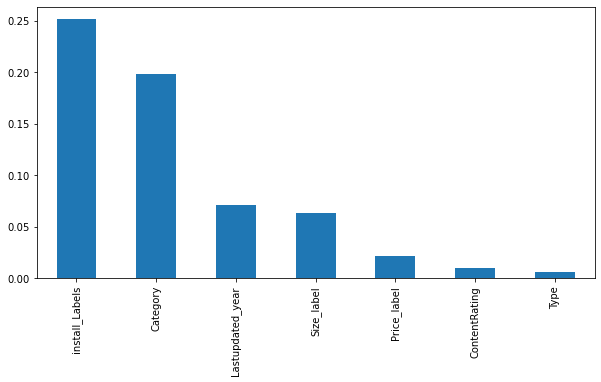

In [176]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10,5))

In [177]:
## As we can see there are dependency with the depenent feature. eventhough there are not much of significant dependency with the
## depdendent feature. we are not going to drop any feature since the input dimension is less.

In [178]:
df_final.columns

Index(['Category', 'Rating', 'Type', 'ContentRating', 'Lastupdated_year',
       'install_Labels', 'Price_label', 'Size_label'],
      dtype='object')

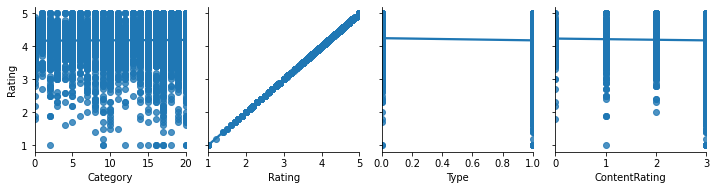

In [179]:
## lets see the pair wise plot
sns.pairplot(df_final,x_vars=['Category', 'Rating', 'Type', 'ContentRating'],y_vars=['Rating'],kind='reg')

In [180]:
## Since Independent variables are categorical we can find any paterns w.r.to dependent variables

In [181]:
## Lets try to fit Models

In [182]:
## Linear regression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)
y_pred = linear.predict(x_test)
print("R-square",r2_score(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))




R-square 0.03150540090295606
MSE 0.2554060372298622


In [ ]:
## Linear regression using statsmodel

In [241]:
import statsmodels.api as sm

In [242]:
model=sm.OLS(y_train,x_train)

In [243]:
result=model.fit()

In [244]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          7.407e+04
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:15:24   Log-Likelihood:                         -5600.0
No. Observations:                7587   AIC:                                  1.121e+04
Df Residuals:                    7580   BIC:                                  1.126e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Category             0.0040      0.001      4.081      0.000       0.002       0.006
Type                -3.6427      0.061    -59.797      0.000      -3.762      -3.523
ContentRating        0.0301      0.008      3.841      0.000       0.015       0.045
Lastupdated_year     0.1023      0.005     19.020      0.000       0.092       0.113
install_Labels       0.0554      0.007      7.684      0.000       0.041       0.070
Price_label          3.4433      0.049     70.435      0.000       3.347       3.539
Size_label          -0.0099      0.007     -1.362      0.173      -0.024       0.004
==============================================================================
Omnibus:                     2109.326   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17857.637
Skew:                          -1.091   Prob(JB):                         0.00
Kurtosis:                      10.193   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## It seems the variance covered well in the train data

In [262]:
y_pred2=result.predict(x_test)


In [264]:
final_value=np.round(y_pred2,2)

In [269]:
print("R-square",r2_score(y_test,final_value))
print("MSE",mean_squared_error(y_test,final_value))

R-square -0.04623749774806196
MSE 0.2759079643296433


In [ ]:
## The variance seems to be in negative. We may have over fitted the model.

In [ ]:
## calculating the sum of residuals

In [272]:
total=(y_test - final_value)
squaretotal=total **2

In [274]:
total_sum=sum(squaretotal)

In [298]:
total_sum

897.252700000001

In [ ]:
## calculating the sum for y - mean of y

In [277]:
mean=y_test.mean()

In [293]:
summa=[]
for i in y_test:
    sub=(i - mean)**2
    summa.append(sub)
    

In [296]:
total_avg=sum(summa)


In [297]:
total_avg

857.5994474784682

In [301]:
r2= 1- total_sum/total_avg

In [302]:
r2

-0.04623749774807129

#### Observation: the r2 for test indicates we have fitted a worst line. as the rediduals are high compare sum of average of the actual value
- Reasons:
    - The data would have been scattered a lot
    - We have not performed any data transformation to make data normally disturbed
    

In [303]:
## lets perform some regularization technique to improve our model
from sklearn.linear_model import Ridge
ridge=Ridge()
param={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,8,10,15,30,45,55,65,85,100]}
ridge_regrssor=GridSearchCV(ridge,param_grid=param,scoring='neg_mean_squared_error',cv=5)
ridge_regrssor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 8, 10, 15, 30, 45, 55, 65, 85, 100]},
             scoring='neg_mean_squared_error')

In [304]:
print(ridge_regrssor.best_params_)
print(ridge_regrssor.best_score_)

{'alpha': 1e-15}
-0.2466954062687594


In [306]:
ridge_regrssor.fit(x_train, y_train)
y_pred = ridge_regrssor.predict(x_test)
print("MSE",mean_squared_error(y_test,y_pred))
print("r2",r2_score(y_test,y_pred))

MSE 0.255406339490167
r2 0.03150425473790874


In [319]:
## Lasso regression
from sklearn.linear_model import Lasso
lasso=Lasso()
param={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,8,10,15,30,45,55,65,85,100]}
lasso_regrssor=GridSearchCV(lasso,param_grid=param,scoring='neg_mean_squared_error',cv=5)
lasso_regrssor.fit(x,y)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 8, 10, 15, 30, 45, 55, 65, 85, 100]},
             scoring='neg_mean_squared_error')

In [320]:
print(lasso_regrssor.best_params_)
print(lasso_regrssor.best_score_)

{'alpha': 1e-15}
-0.24669541018149405


In [321]:
lasso_regrssor.fit(x_train, y_train)
y_pred = lasso_regrssor.predict(x_test)
print("MSE",mean_squared_error(y_test,y_pred))
print("r2",r2_score(y_test,y_pred))

MSE 0.2554060372298793
r2 0.03150540090289111


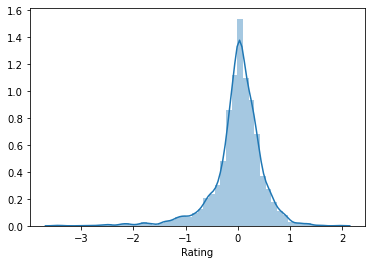

In [323]:
sns.distplot(y_test - y_pred)

In [359]:
## POlynomial regression
from sklearn.preprocessing import PolynomialFeatures
polynom= PolynomialFeatures(degree=1)
x_poly=polynom.fit_transform(x)

In [360]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x_poly,y,test_size=0.3,random_state=0)

In [362]:
polyreg=LinearRegression()
polyreg.fit(x1_train,y1_train)

LinearRegression()

In [363]:
y_pred_poly = polyreg.predict(x1_test)
print("MSE",mean_squared_error(y1_test,y_pred_poly))
print("r2",r2_score(y1_test,y_pred_poly))

MSE 0.2554060372298621
r2 0.03150540090295628


## We have tried to increase the r2 value but sill there is no significant improvement
- Reasons:
    - Again Major reason will be since all the independent features are not continues in nature hence the data may have scattered a lot
    - We have not performed any transformation as well.

In [193]:
## It seems the r2 is pretty much low. Lets try with another technique
## The model is not making any sense

In [322]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor(n_estimators=250)
random_regressor.fit(x_train, y_train)
y_pred = random_regressor.predict(x_test)
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.23134961621578573


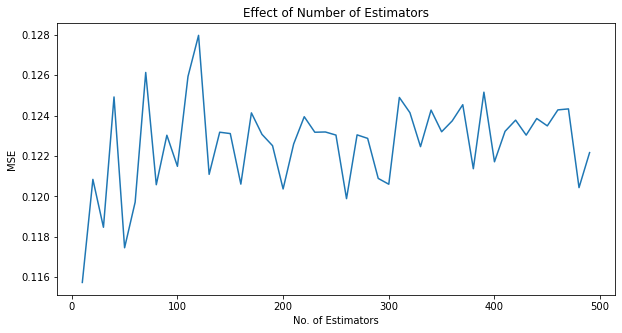

In [195]:
## Lets perform some hyper paramter tuning
estimators = np.arange(10, 500, 10)
mse_list = []
for i in estimators:
    random_regressor.set_params(n_estimators=i)
    random_regressor.fit(x_train, y_train)
    y_pred = random_regressor.predict(x_test)
    mse_list.append(mean_squared_error(y_test,y_pred))
plt.figure(figsize=(10, 5))
plt.xlabel("No. of Estimators")
plt.ylabel("MSE")
plt.title("Effect of Number of Estimators")
plt.plot(estimators, mse_list)

In [222]:
## Cross val score
from sklearn.model_selection import cross_val_score
score=cross_val_score(random_regressor,x,y,cv=5,scoring='neg_mean_squared_error')
Meanscore_Random=score.mean()

In [211]:
## Cross val score for linear regression
from sklearn.model_selection import cross_val_score
score=cross_val_score(linear,x,y,cv=5,scoring='neg_mean_squared_error')
Meanscore_linear=score.mean()

In [223]:
## Lets perform some hyper parameter tuning
from sklearn.model_selection import GridSearchCV
param_grid={"n_estimators": [100,150,200],
"criterion" : ['mse','mae'],
"min_samples_split":[2,4,6],           
}

In [224]:
model=GridSearchCV(estimator=random_regressor,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,n_jobs=1)

In [225]:
model.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
model.best_score_

In [ ]:
model.best_params_

In [198]:
## As we can see eventhough if we increase the no of parameters score is not deviating b/w .229 and .2295
## hence we can proceed with bw 50 to 100. 

In [199]:
## KNNregressor
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=20)
knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)
print("MSE",mean_squared_error(y_test,y_pred))
print("R-square",r2_score(y_test,y_pred))



MSE 0.23403405842558428
R-square 0.11254751826422704


In [200]:
accuracy_rate=[]
for i in range(1,40):
    knn_regressor = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn_regressor,x,y,cv=5,scoring='neg_mean_squared_error')
    Meanscore_Random=score.mean()
    ##y_pred = knn_regressor.predict(x_test)
    accuracy_rate.append(Meanscore_Random)


Text(0, 0.5, 'MSE')

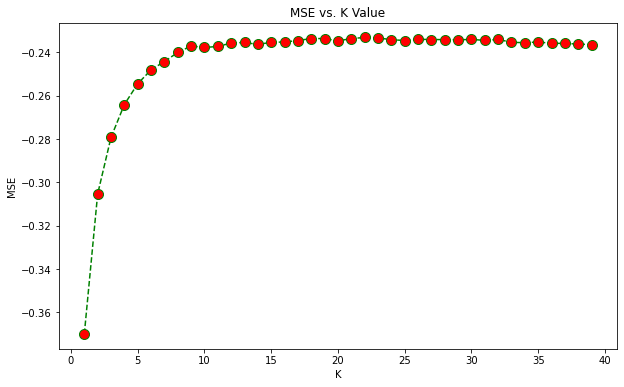

In [201]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='green',linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('MSE vs. K Value')
plt.xlabel('K')
plt.ylabel('MSE')

In [202]:
## As we can see after the K value of 5 the error rate fot flattened. hence its better to 5 or 6 

## Final observation:
  - All the three Algorithms Are performing well. since we dont have huge amount of data.
  - There are no much of a difference in the error rate in each algorithms.
  - We will proceed with Randomforest regressor which has slighty better error rate when compare to rest of the algorithms

In [203]:
import pickle
## Creating  a pickle file
file= open('Playstore_app_prediction.pkl','wb')

In [204]:
## dump the file with the model
pickle.dump(random_regressor,file)

In [205]:
##conda activate googleprediction